# Sumário:

O primeiro capítulo do livro aborda a construção de Redes neurais
para reconhecimento de manuscritos. Deste modo abordando:

1. Introduz o Conceito de Perceptron: A unidade fundamental de uma rede neural, tecnica criada por Frank Rosenblatt na década de 50.

2. Introduz a Sigmoid como função de ativação: A função de ativação, ou função deslinearizadora é fundamental para aumentar o escopo de aprendizado do modelo.

3. Introduz o aprendizado por Gradiente Descendente: O algorítmo de
Gradiente Descendente é um dos principais métodos de aprendizado
de muitos modelos de aprendizado de máquina e aqui não é diferente.

Livro: http://neuralnetworksanddeeplearning.com/chap1.html

# Preparando o ambiente:

Para realizarmos nosso estudos, vamos trabalhar em cima do
MNIST que um grande banco de dados de dígitos manuscritos,
comumente usado para treinar vários sistemas de processamento
de imagens. O banco de dados também é amplamente utilizado para
treinamento e teste no campo do aprendizado de máquina.

Link: https://pt.wikipedia.org/wiki/Banco_de_dados_MNIST

Dito isso, precisamos preparar o ambiente para o estudo, o que consiste basicamente em adiquirir o dataset.


    Nessa parte, o livro não trabalha com nenhuma ferramenta
    especializada em Deep Learning, como Pytorch ou Tensorflow,
    trabalhando apenas como o Numpy para a algebra linear.

In [ ]:
# Package para algebra linear:
import numpy as np

# Packages para visualização de dados:
from matplotlib import pyplot as plt
import seaborn as sns
from graphviz import Digraph

# Construindo a nossa Rede Neural:

    Tendo preparado o ambiente, podemos então começar a
    elaborar a nossa rede neural. Não só nesse livro, mas
    geralmente a implementação é estruturada em forma de
    classes, o que será feito aqui também.

    Mas isso não significa que uma rede neural não possa
    ser implementada numa linguagem sem orientação a objeto.
    Tudo que importa aqui é a matemática, como os principios
    matemáticos serão abordados, pouco importa.

**Elementos do Multilayer Perceptron**

    O primeiro passo aqui é construir o nosso multilayer perceptron

In [ ]:
# Criando a Classe:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

Parâmetro *qtd_neuron*:

    O parametro qtd_neuron serve para definir a quantidade de neurônio
    em cada camada. Ou seja, ela é uma vetor onde cada entrada do vetor
    contém o numero de neurônios naquela respectiva camada.

Note:

    Note que tantos os viéses e os pesos são inicializados aleatóriamente,
    de modo que geral uma distribuição normal padrão, ou seja, uma gaussiana
    de média = 0 e desvio padrão = 1. Esta inicialização aleatória dá ao
    algoritmo gradiente descendente, que é um algorítmo estocastico, uma
    condição inicial razoável.

    Observe também que o que o código de inicialização da rede assume
    que o primeira camada de neurônios é uma camada de entrada e omite
    a definição de quaisquer vieses para esses neurônios, uma vez que
    vieses só são usados ​​no cálculo das saídas das camadas posteriores


In [ ]:
# Exemplo:
MLP = RedeNeural([3,2,1]);MLP

    Podemos checar então os atributos da nossa rede.

In [ ]:
# Pesos:
MLP.pesos

[array([[-0.64146532, -0.44715527, -1.3429761 ],
        [ 0.12339775, -0.33530215,  1.08862055]]),
 array([[-1.92745447,  0.09752509]])]

In [ ]:
# Viéses
MLP.vieses

[array([[-1.22991892],
        [-0.29676554]]),
 array([[0.35156282]])]

**Função de Ativação**

    Criado o nosso método construtor da classe, que é o nosso método
    de configuração do nosso MLP, precisamos então pensar na nossa
    função deslinearizadora. O livro implementa a sigmoid, que é
    baseada no conceito de entropia cruzada.

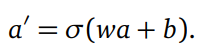

    Onde temos, que:
    
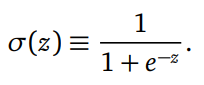
    
    Além da sigmoid, apresentada no livro, eu vou aprensentar
    a relu, que é outra função de ativação, uma boa opção e
    de implementação fácil.

In [ ]:
# Complementando a classe com as funções de ativação sigmoid:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''

  # Multlayer Perceptrion:
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

  # Funções de Ativação:
  def sigmoid(self, z):
    '''
      Função logistica utilzada aqui
    para deslinearizar o perceptron.
    '''
    return 1/(1+np.exp(-z))

**Sigmoid**

    O livro define a aplicação da sigmoid como neuronio sigmoid e faz
    distinção entre esse neuronio sigmoid e o neuronio perceptron.
    
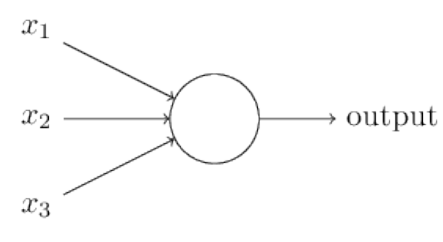    
    
    Eu entendi o que ele quis dizer, até que faz sentido sim, porem, por
    nunca ter visto nenhuma outra literatura usando essa definição, vou
    tratar como a maioria faz. O neuronio é o perceptron e a sigmoid,
    como todas as outras funções de ativação, é um processo executado
    na ultima camada, resultando na resposta final.

In [ ]:
# Complementando a classe com as funções de ativação relu:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''

  # Multlayer Perceptrion:
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

  # Funções de Ativação:
  def sigmoid(self, z):
    '''
      Função logistica utilzada aqui
    para deslinearizar o perceptron.
    '''
    return 1/(1+np.exp(-z))

  def relu(self,z):
    '''
      A função relu, tipo um gate,
    dislinearizando o perceptron.
    '''

    if z > 0:
      return z
    else:
      return 0

**Por que deslinearizar?**

    Para ajustar o aprendizado da rede, de modo que não haja instabilidade
    no processo de treinamento. Se você notar, uma rede neural até antes da
    saída funciona como uma regressão linear (Inclusive, por isso do nome
    "função deslinearizadora"). Ou seja, matemáticamente falando, se fossemos
    ajustar os pesos (ou viéses) nesse processo linear, pequenas mudanças nos
    parâmetros de pesos acarretariam em mudanças significativas no aprendizado
    e ai o aprendizado da rede neural não ficaria fino o suficiente.

    O processo de aprendizado de uma rede neural é justamente o processo de
    ajustar os pesos, e o que gostaríamos é que pequenas mudança no peso cause
    apenas uma mudança correspondente pequena na saída da rede. O problema é
    que isso não é o que acontece quando nossa rede contém perceptrons.

    


**Feedforward**

    Definido-se o funcionamento da rede, podemos então definir como é
    feita a aquisição de resposta da rede. Basicamente o feedfoward trada
    desse processo de aquisição de resposta pela rede.

    Aqui vale uma nota, porque ele ajuda o processo de treinamento na
    medida que ele gera dos dados de predição a serem avaliados mas dito
    isso, esse processo não faz parte do treinamento do modelo.

In [ ]:
# Complementando a classe com o feedforward:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''

  # Multlayer Perceptrion:
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

  # Funções de Ativação:
  def sigmoid(self, z):
    '''
      Função logistica utilzada aqui
    para deslinearizar o perceptron.
    '''
    return 1/(1+np.exp(-z))

  def relu(self,z):
    '''
      A função relu, tipo um gate,
    dislinearizando o perceptron.
    '''

    if self.z > 0:
      return z
    else:
      return 0

  # Método de Feedforward:
  def feedforward(self, entrada, funcao_ativacao):
    '''
      Função de treinamento do modelo, executa os
    calculos, até a saída.
    '''

    # Feedfoward dado a função de ativação:
    for b, w in zip(self.vieses, self.pesos):
      if funcao_ativacao == 'sigmod':
        saida = self.sigmoid(np.dot(w,entrada)+b)
      elif funcao_ativacao == 'relu':
        saida = self.relu(np.dot(w,self.entrada)+b)

    return saida

## Treinamento da Rede:

    Aqui é onde a mágica de fato acontece e onde encontra-se a parte
    a maioria das definições que se houve sobre as redes neurais.
    Aqui precisamos definir uma série de elementos para de fato
    conseguirmos entender como uma rede neural aprense.

**Função Custo**

    A primeira coisa que precisamos definir é a função custo, também
    chamada de função objetivo, que nada mais é a função que quantifica
    o quão bem estamos atingindo esse objetivo.

    A ideia central é encontrar os pesos e viéses (ou parâmetros) da rede
    neural que minimizam essa função custo. A função custo é definida como
    a média dos quadrados das diferenças entre a saída esperada da rede
    (dada pelos dados de treinamento) e a saída real produzida pela rede
    para esses mesmos dados.
    
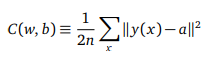

    Essa função custo é uma forma suave de medir o quão bem a rede está
    performando, e é escolhida porque é diferenciável, o que facilita o
    uso de técnicas como a descida do gradiente.

**Stocastic Gradient Descendent**

    O Stocastic Gradient Descendent (SGD) é o algorítmos que usaremos para
    que consegamos ajustar o modelo. Ele é uma variação do algoritmo de
    descida do gradiente utilizado para treinar redes neurais. A principal
    diferença entre o SGD e o gradiente descendente tradicional é que o SGD
    realiza a atualização dos parâmetros da rede neural de forma estocástica,
    ou seja, em cada iteração do treinamento, os parâmetros são atualizados
    com base em um único exemplo de treinamento aleatoriamente escolhido ou
    em um pequeno conjunto de exemplos de treinamento (mini-batch), em vez
    de utilizar o conjunto de dados completo.

**Mini-Batchs**

    Em vez de alimentar todos os dados de treinamento de uma vez só (batch
    completo), o conjunto de dados de treinamento é dividido em pequenos
    subconjuntos chamados de mini-batchs. Cada mini-batch contém um número
    fixo de exemplos de treinamento.

    Ao utilizar mini-batchs, o processo de treinamento é realizado
    iterativamente em cada mini-batch. Isso oferece várias vantagens:

    1. Eficiência computacional: Processar todos os exemplos de treinamento
    de uma só vez pode ser computacionalmente custoso, especialmente para
    conjuntos de dados grandes. O uso de mini-batchs permite distribuir o
    processamento ao longo do tempo, tornando o treinamento mais eficiente.

    2. Memória: Para conjuntos de dados muito grandes, pode ser difícil
    armazenar todos os exemplos de treinamento na memória ao mesmo tempo.
    Com mini-batchs, apenas um pequeno subconjunto dos dados precisa ser
    carregado na memória de cada vez, tornando mais viável o treinamento
    de redes neurais com grandes conjuntos de dados.

    3. Estocasticidade: O termo "estocástico" em SGD refere-se à aleatoriedade
    na seleção dos mini-batchs. Cada mini-batch é selecionado aleatoriamente
    do conjunto de dados de treinamento em cada iteração. Isso introduz uma
    variação estocástica no processo de treinamento, o que pode ajudar a
    evitar mínimos locais e a promover uma exploração mais ampla do espaço
    de parâmetros da rede neural.

    4. Regularização: O uso de mini-batchs também pode fornecer um efeito
    de regularização, pois os pesos da rede neural são atualizados com base
    em uma estimativa do gradiente calculada em um subconjunto dos dados de
    treinamento, em vez de utilizar o gradiente calculado em todo o conjunto
    de dados. Isso introduz uma fonte de ruído nos gradientes, que pode
    ajudar a prevenir o overfitting.

In [ ]:
# Complementando a rede com o processo de Backpropagation:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''

  # Multlayer Perceptrion:
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

  # Funções de Ativação:
  def sigmoid(self, z):
    '''
      Função logistica utilzada aqui
    para deslinearizar o perceptron.
    '''
    return 1/(1+np.exp(-z))

  def relu(self,z):
    '''
      A função relu, tipo um gate,
    dislinearizando o perceptron.
    '''

    if self.z > 0:
      return z
    else:
      return 0

  # Método de Feedforward:
  def feedforward(self, entrada, funcao_ativacao):
    '''
      Função de treinamento do modelo, executa os
    calculos, até a saída.
    '''

    # Feedfoward dado a função de ativação:
    for b, w in zip(self.vieses, self.pesos):
      if funcao_ativacao == 'sigmod':
        saida = self.sigmoid(np.dot(w,entrada)+b)
      elif funcao_ativacao == 'relu':
        saida = self.relu(np.dot(w,self.entrada)+b)

    return saida

  # Treinamento da rede:
  def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
    '''
      Treine a rede neural usando descida gradiente estocástica em minilote. O
    "training_data" é uma lista de tuplas "(x, y)" representando o treinamento
    entradas e as saídas desejadas. Os outros parâmetros não opcionais são auto-
    explicativo. Se "test_data" for fornecido, a rede será avaliada
    em relação aos dados de teste após cada época e o progresso parcial é impresso.
    Isso é útil para monitorar o progresso, mas retarda substancialmente as coisas.
    '''

    if test_data:
      n_test = len(test_data)
      n = len(training_data)

    for j in range(epochs):
      np.random.suffler(training_data)
      mini_batches = [training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
      for mini_batch in mini_batches:
        self.update_mini_batch(mini_batch, eta)

      if test_data:
        print(f'Epoch {j}: {self.evaluate(test_data)}, {n_test}')
      else:
        print(f'Epoch {j} complete')

**Atualização dos valores**

In [ ]:
# Complementando a rede com o processo de Backpropagation:
class RedeNeural(object):
  '''
    Classe que construtora da nossa rede neural.
  '''

  # Multlayer Perceptrion:
  def __init__(self, qtd_neuron):
    '''
      Método construtor do nosso MLP, Multlayer Perceptron.
    Aqui constará os parâmetros que serão utilizados para
    gerar a nossa rede neural.
    '''
    self.num_camadas = len(qtd_neuron)
    self.qtd_neuron = qtd_neuron
    self.vieses = [np.random.randn(y,1) for y in qtd_neuron[1:]] # Note que não há viés na camada 0
    self.pesos = [np.random.randn(y,x) for x, y in zip(qtd_neuron[:-1], qtd_neuron[1:])]

  # Funções de Ativação:
  def sigmoid(self, z):
    '''
      Função logistica utilzada aqui
    para deslinearizar o perceptron.
    '''
    return 1/(1+np.exp(-z))

  def relu(self,z):
    '''
      A função relu, tipo um gate,
    dislinearizando o perceptron.
    '''

    if self.z > 0:
      return z
    else:
      return 0

  # Método de Feedforward:
  def feedforward(self, entrada, funcao_ativacao):
    '''
      Função de treinamento do modelo, executa os
    calculos, até a saída.
    '''

    # Feedfoward dado a função de ativação:
    for b, w in zip(self.vieses, self.pesos):
      if funcao_ativacao == 'sigmod':
        saida = self.sigmoid(np.dot(w,entrada)+b)
      elif funcao_ativacao == 'relu':
        saida = self.relu(np.dot(w,self.entrada)+b)

    return saida

  # Treinamento da Rede:
  def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
    '''
      Treine a rede neural usando descida gradiente estocástica em minilote. O
    "training_data" é uma lista de tuplas "(x, y)" representando o treinamento
    entradas e as saídas desejadas. Os outros parâmetros não opcionais são auto-
    explicativo. Se "test_data" for fornecido, a rede será avaliada
    em relação aos dados de teste após cada época e o progresso parcial é impresso.
    Isso é útil para monitorar o progresso, mas retarda substancialmente as coisas.
    '''

    if test_data:
      n_test = len(test_data)
      n = len(training_data)

    for j in range(epochs):
      np.random.suffler(training_data)
      mini_batches = [training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)]
      for mini_batch in mini_batches:
        self.update_mini_batch(mini_batch, eta)

      if test_data:
        print(f'Epoch {j}: {self.evaluate(test_data)}, {n_test}')
      else:
        print(f'Epoch {j} complete')

  # Mini_batch:
  def update_mini_batch(self, mini_batch, eta):
    '''
      Atualize os pesos e tendências da rede aplicando gradiente descendente usando
    retropropagação para um único minilote. O "mini_batch" é uma lista de tuplas
    "(x, y)" e "eta" é a taxa de aprendizagem.
    '''

    nabla_b = [np.zeros(b.shape) for b in self. vieses]
    nabla_w = [np.zeros(w.shape) for w in self.pesos]

    for x,y in mini_batch:
      delta_nabla_b, delta_nabla_w = self.backprop(x,y)
      nabla_b = [nb + dnb for nb, dnb in zip(nabla_b,delta_nabla_b)]
      nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

    self.pesos = [w - (eta/len(mini_batch))*nw for w, nw in zip(self.pesos,nabla_w)]
    self.vieses = [b - (eta/len(mini_batch))*nb for b, nb in zip(self.vieses, nabla_b)]

**Backpropagation**

    Definido-se os elementos do treinamneto, como a função custo e o
    algorítmo de otimização da função custo, podemos então falar
    do treinamento da rede, que ocorre por meio do backpropagation.

    Dado o resultado obtido pelo feedforward e o quanto isso se
    distancia da nosso resultado real, a ideia é ajustar os pesos
    para que possamos melhorar a predição da nossa rede.


In [ ]:
# Dependências utilizadas:
import random
import numpy as np

# A Rede Neural:
class RedeNeural(object):
    '''
    Classe construtora da nossa rede neural.
    '''

    def __init__(self, tamanhos, funcao_ativacao='sigmoid'):
        '''
        Método construtor do MLP (Multilayer Perceptron).
        Aqui constarão os parâmetros que serão utilizados para
        gerar a nossa rede neural.
        '''
        self.num_camadas = len(tamanhos)
        self.tamanhos = tamanhos
        self.funcao_ativacao = funcao_ativacao
        self.vieses = [np.random.randn(y, 1) for y in tamanhos[1:]]
        self.pesos = [np.random.randn(y, x) for x, y in zip(tamanhos[:-1], tamanhos[1:])]

    # Método de Feedforward:
    def feedforward(self, entrada):
        """Retorna a saída da rede neural se 'entrada' for o input."""

        #
        for b, w in zip(self.vieses, self.pesos):
            entrada = self.ativacao(np.dot(w, entrada) + b)

        return entrada

    def SGD(self, dados_treinamento, epocas, tamanho_mini_batch, eta, dados_teste=None):
        '''
        Treina a rede neural usando descida gradiente estocástica em mini-lote.
        "dados_treinamento" é uma lista de tuplas "(x, y)" representando as entradas
        de treinamento e as saídas desejadas. Os outros parâmetros não opcionais são autoexplicativos.
        Se "dados_teste" for fornecido, a rede será avaliada em relação aos dados de teste após cada época,
        e o progresso parcial é impresso. Isso é útil para monitorar o progresso, mas retarda substancialmente as coisas.
        '''
        if dados_teste:
            n_teste = len(dados_teste)
        n = len(dados_treinamento)

        for j in range(epocas):
            random.shuffle(dados_treinamento)
            mini_batches = [dados_treinamento[k:k + tamanho_mini_batch] for k in range(0, n, tamanho_mini_batch)]

            for mini_batch in mini_batches:
                self.atualiza_mini_batch(mini_batch, eta)

            if dados_teste:
                print(f'Época {j}: {self.avaliacao(dados_teste)/ n_teste}')
            else:
                print(f'Época {j} concluída')

    def atualiza_mini_batch(self, mini_batch, eta):
        '''
        Atualiza os pesos e vieses da rede aplicando descida gradiente usando retropropagação para um único mini-lote.
        O "mini_batch" é uma lista de tuplas "(x, y)" e "eta" é a taxa de aprendizagem.
        '''
        nabla_b = [np.zeros(b.shape) for b in self.vieses]
        nabla_w = [np.zeros(w.shape) for w in self.pesos]

        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

        self.pesos = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.pesos, nabla_w)]
        self.vieses = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.vieses, nabla_b)]

    def backprop(self, x, y):
        '''
        Retorna uma tupla "(nabla_b , nabla_w)" representando o
        gradiente para a função de custo C_x. "nabla_b" e "nabla_w"
        são listas camada por camada de matrizes numpy, semelhantes
        para "self.vieses" e "self.pesos".
        '''
        nabla_b = [np.zeros(b.shape) for b in self.vieses]
        nabla_w = [np.zeros(w.shape) for w in self.pesos]

        # Feedforward
        ativacao = x
        ativacoes = [x]  # lista para armazenar todas as ativações, camada por camada
        zs = []  # lista para armazenar todos os vetores z, camada por camada

        for b, w in zip(self.vieses, self.pesos):
            z = np.dot(w, ativacao) + b
            zs.append(z)
            ativacao = self.ativacao(z)
            ativacoes.append(ativacao)

        # Retropropagação
        delta = self.derivada_custo(ativacoes[-1], y) * self.derivada_ativacao(zs[-1])

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, ativacoes[-2].transpose())

        for l in range(2, self.num_camadas):
            z = zs[-l]
            delta = np.dot(self.pesos[-l + 1].transpose(), delta) * self.derivada_ativacao(z)
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, ativacoes[-l - 1].transpose())

        return nabla_b, nabla_w

# Código completo:

    Deste modo, percorrido todos os pontos da contrução e do aprendizado
    da rede neural, podemos então definir a sua classe de forma completa.

In [ ]:
# Dependências utilizadas:
import random
import numpy as np

# A Rede Neural:
class RedeNeural(object):
    '''
    Classe construtora da nossa rede neural.
    '''

    def __init__(self, tamanhos, funcao_ativacao='sigmoid'):
        '''
        Método construtor do MLP (Multilayer Perceptron).
        Aqui constarão os parâmetros que serão utilizados para
        gerar a nossa rede neural.
        '''
        self.num_camadas = len(tamanhos)
        self.tamanhos = tamanhos
        self.funcao_ativacao = funcao_ativacao
        self.vieses = [np.random.randn(y, 1) for y in tamanhos[1:]]
        self.pesos = [np.random.randn(y, x) for x, y in zip(tamanhos[:-1], tamanhos[1:])]

    def feedforward(self, entrada):
        """Retorna a saída da rede neural se 'entrada' for o input."""
        for b, w in zip(self.vieses, self.pesos):
            entrada = self.ativacao(np.dot(w, entrada) + b)

        return entrada

    def SGD(self, dados_treinamento, epocas, tamanho_mini_batch, eta, dados_teste=None):
        '''
        Treina a rede neural usando descida gradiente estocástica em mini-lote.
        "dados_treinamento" é uma lista de tuplas "(x, y)" representando as entradas
        de treinamento e as saídas desejadas. Os outros parâmetros não opcionais são autoexplicativos.
        Se "dados_teste" for fornecido, a rede será avaliada em relação aos dados de teste após cada época,
        e o progresso parcial é impresso. Isso é útil para monitorar o progresso, mas retarda substancialmente as coisas.
        '''
        if dados_teste:
            n_teste = len(dados_teste)
        n = len(dados_treinamento)

        for j in range(epocas):
            random.shuffle(dados_treinamento)
            mini_batches = [dados_treinamento[k:k + tamanho_mini_batch] for k in range(0, n, tamanho_mini_batch)]

            for mini_batch in mini_batches:
                self.atualiza_mini_batch(mini_batch, eta)

            if dados_teste:
                print(f'Época {j}: {self.avaliacao(dados_teste)/ n_teste}')
            else:
                print(f'Época {j} concluída')

    def atualiza_mini_batch(self, mini_batch, eta):
        '''
        Atualiza os pesos e vieses da rede aplicando descida gradiente usando retropropagação para um único mini-lote.
        O "mini_batch" é uma lista de tuplas "(x, y)" e "eta" é a taxa de aprendizagem.
        '''
        nabla_b = [np.zeros(b.shape) for b in self.vieses]
        nabla_w = [np.zeros(w.shape) for w in self.pesos]

        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]

        self.pesos = [w - (eta / len(mini_batch)) * nw for w, nw in zip(self.pesos, nabla_w)]
        self.vieses = [b - (eta / len(mini_batch)) * nb for b, nb in zip(self.vieses, nabla_b)]

    def backprop(self, x, y):
        '''
        Retorna uma tupla "(nabla_b , nabla_w)" representando o
        gradiente para a função de custo C_x. "nabla_b" e "nabla_w"
        são listas camada por camada de matrizes numpy, semelhantes
        para "self.vieses" e "self.pesos".
        '''
        nabla_b = [np.zeros(b.shape) for b in self.vieses]
        nabla_w = [np.zeros(w.shape) for w in self.pesos]

        # Feedforward
        ativacao = x
        ativacoes = [x]  # lista para armazenar todas as ativações, camada por camada
        zs = []  # lista para armazenar todos os vetores z, camada por camada

        for b, w in zip(self.vieses, self.pesos):
            z = np.dot(w, ativacao) + b
            zs.append(z)
            ativacao = self.ativacao(z)
            ativacoes.append(ativacao)

        # Retropropagação
        delta = self.derivada_custo(ativacoes[-1], y) * self.derivada_ativacao(zs[-1])

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, ativacoes[-2].transpose())

        for l in range(2, self.num_camadas):
            z = zs[-l]
            delta = np.dot(self.pesos[-l + 1].transpose(), delta) * self.derivada_ativacao(z)
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, ativacoes[-l - 1].transpose())

        return nabla_b, nabla_w

    def avaliacao(self, dados_teste):
        '''
        Retorna o número de entradas de teste para as quais a
        rede neural produz o resultado correto. A saída da rede
        neural é assumida como o índice do neurônio que tiver a
        maior ativação na camada final.
        '''
        resultados_teste = [(np.argmax(self.feedforward(x)), y) for (x, y) in dados_teste]
        return sum(int(x == y) for (x, y) in resultados_teste)

    def derivada_custo(self, saida_ativacao, y):
        '''
        Retorna o vetor de derivadas parciais \partial C_x /
        \partial a para as ativações de saída.
        '''
        return (saida_ativacao - y)

    def derivada_ativacao(self, z):
        '''
        Retorna a derivada da função de ativação em z.
        '''
        if self.funcao_ativacao == 'sigmoid':
            return sigmoid_prime(z)
        elif self.funcao_ativacao == 'relu':
            return relu_prime(z)

    def ativacao(self, z):
        '''
        Retorna a função de ativação aplicada em z.
        '''
        if self.funcao_ativacao == 'sigmoid':
            return sigmoid(z)
        elif self.funcao_ativacao == 'relu':
            return relu(z)

    Eu mantive as funções de ativação fora da classe,
    considerei mais facil de se implementar.

In [ ]:
# Fuinções de Ativação:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def relu(z):
        '''
        A função relu, atuando como um "gate", deslineariza o perceptron.
        '''
        return np.maximum(0, z)

def relu_prime(z):
    '''
    Derivada da função relu.
    '''
    return np.where(z > 0, 1, 0)

# Importando os dados:

    Pela forma que os dados estão organizados, se faz necessário construir
    um código para importar os dados. Aqui vamos construir esse código.

In [ ]:
# Standard library
import pickle
import gzip

In [ ]:
def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """

    # Lendo os arquivos e extraindo a informação:
    with gzip.open('neural-networks-and-deep-learning/data/mnist.pkl.gz', 'rb') as f:
      training_data, validation_data, test_data = pickle.load(f, encoding='latin1')

    return (training_data, validation_data, test_data)

In [ ]:
def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]] # Formatação das entradas de treinamento
    training_results = [vectorized_result(y) for y in tr_d[1]] # Formatação dos resultados de treinamento
    training_data = list(zip(training_inputs, training_results)) # Criação do conjunto de dados de treinamento
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]] # Formatação das entradas de validação
    validation_data = list(zip(validation_inputs, va_d[1])) # Criação do conjunto de dados de validação
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]] # Formatação das entradas de teste
    test_data = list(zip(test_inputs, te_d[1])) # Criação do conjunto de dados de teste
    return (training_data, validation_data, test_data)

In [ ]:
def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1)) # Cria um vetor de zeros com 10 dimensões
    e[j] = 1.0  # Define o valor na posição j-ésima como 1.0
    return e

# Treinando a Rede Neural:

    Feito todos os preparativos, vamos fazer a mágica acontecer.

In [ ]:
 # Separando os dados:
 training_data, validation_data, test_data = load_data_wrapper()

In [ ]:
# Instanciando modelo:
net = RedeNeural([784,30,10])

    Carregado os dados e instanciado o modelo, vamos utiliza o
    algorítmo do Gradiente Descendente Estocastico para que a
    rede aprenda com os dados de treino.

    O livro trava com 30 épocas, com tamanho de mini batchs de 10
    e taxa de aprendizado de η = 3,0

In [ ]:
# Ajustando o modelo
net.SGD(training_data , 30, 10, 3, dados_teste = test_data)

Época 0: 0.9049
Época 1: 0.9216
Época 2: 0.9284
Época 3: 0.9354
Época 4: 0.938
Época 5: 0.9348
Época 6: 0.9392
Época 7: 0.942
Época 8: 0.9422
Época 9: 0.942
Época 10: 0.9438
Época 11: 0.9429
Época 12: 0.9468
Época 13: 0.9444
Época 14: 0.9481
Época 15: 0.9479
Época 16: 0.9464
Época 17: 0.9492
Época 18: 0.9467
Época 19: 0.9462
Época 20: 0.9458
Época 21: 0.9483
Época 22: 0.9445
Época 23: 0.9475
Época 24: 0.9479
Época 25: 0.9478
Época 26: 0.9492
Época 27: 0.9471
Época 28: 0.946
Época 29: 0.9464


# Classificando imagens:

    Com a rede treinada, podemos testar a classificação da nossa
    rede e ver como ela se sai.

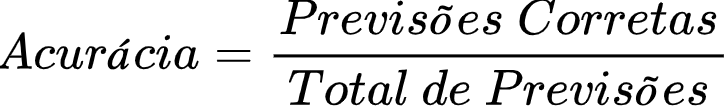

In [ ]:
import cv2

In [ ]:
# Baixando imagem:
!curl -o img.jpg https://d365e82sgxmduv.cloudfront.net/Custom/Content/Products/23/27/2327889_numero-7-em-acm-preto-185mm-685-7-numeral_m2_638103304639197088.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19808  100 19808    0     0  61953      0 --:--:-- --:--:-- --:--:-- 61900


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
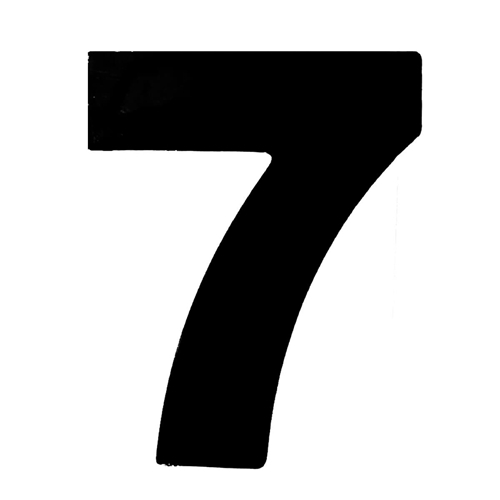

In [ ]:
# Carregar a imagem:
imagem = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE);imagem

In [ ]:
# Redimensionar para 28x28 pixels
imagem_redimensionada = cv2.resize(imagem, (1,784))

In [ ]:
norm_vetor = imagem_redimensionada/np.max(imagem_redimensionada)

**Visualização**

In [ ]:
def visualization(entrada):
  '''
    Função construida para elaborar uma visualização
  gráfica da saída da rede levanto em consideração
  todas as possiveis respostas.

  Entrada:
  - Arry: Resposta da rede adquirida no processo de feedforward

  Saída:
  - None: Gráfico de barras do valor da resposta.
  '''

  # Passar a imagem pela rede neural
  saida_rede = net.feedforward(entrada)

  # Interpretar a saída da rede
  classe_predita = np.argmax(saida_rede)

  print(f"A classe predita para a nova imagem é: {classe_predita}")


  # Criar um array de índices para os dados
  indices = np.arange(len(saida_rede))

  # Criar o gráfico de barras
  plt.figure(figsize=(6, 5))

  plt.bar(indices, saida_rede.flatten())
  plt.xlabel('Possíveis respostas')
  plt.ylabel('Saídas da Rede')
  plt.title('Visualização da Resposta da Rede')
  plt.xticks(indices)
  plt.show()

A classe predita para a nova imagem é: 7


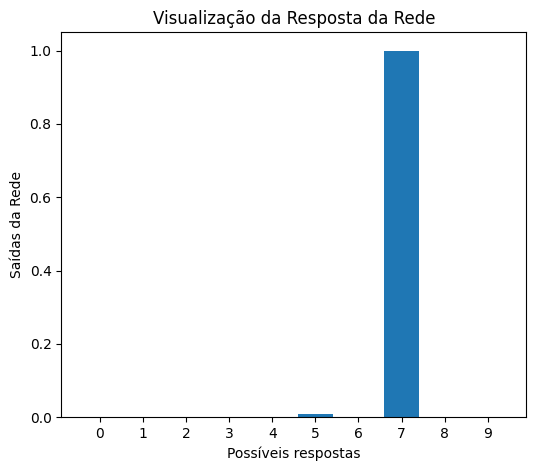

In [ ]:
visualization(norm_vetor)